In [3]:
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib.colors as colors
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

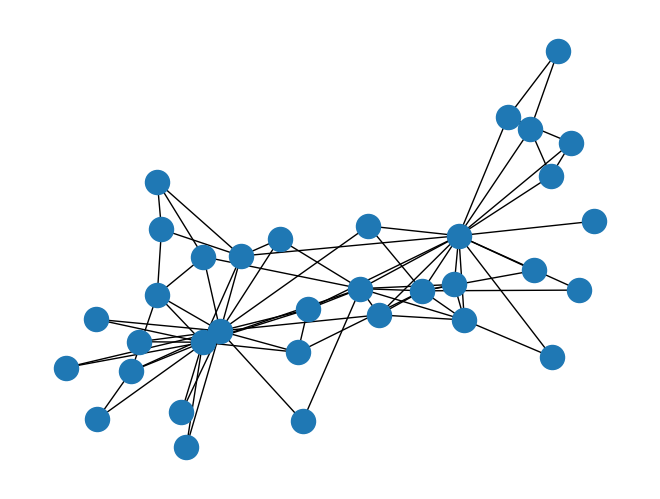

In [4]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)
# nx.info(G)

In [5]:
def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [6]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
type(y_true)

list

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


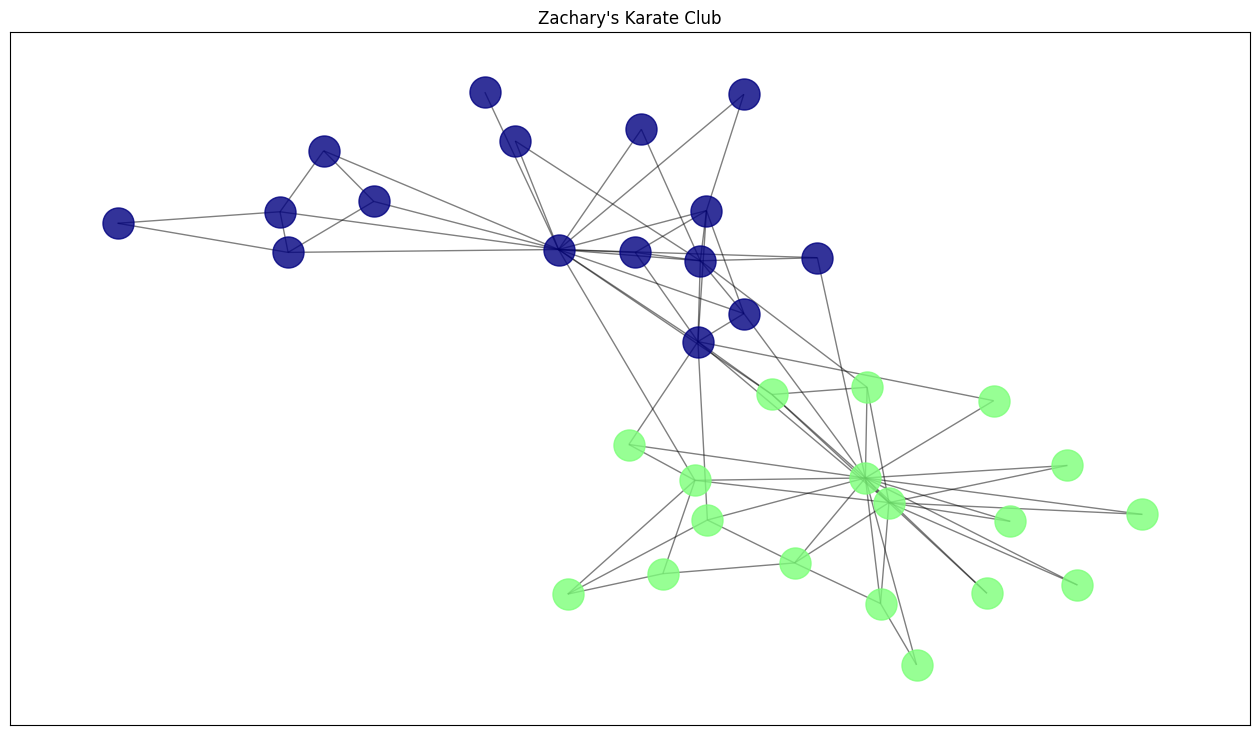

In [7]:
draw_communities(G, y_true, pos)

In [28]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[int(node)][int(neighbor)] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [9]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [10]:
k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

In [11]:
k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [12]:
algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

In [13]:
algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

In [14]:
algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

# Fit all models
for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

In [15]:
# Check to see how many cluster the affinity propagation algo thinks there is
cluster_centers_indices = algorithms['affinity'].cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

8


In [16]:
algorithms['affinity'].labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 1, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2,
       4, 6, 5, 5, 6, 3, 3, 6, 4, 5, 7, 7], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

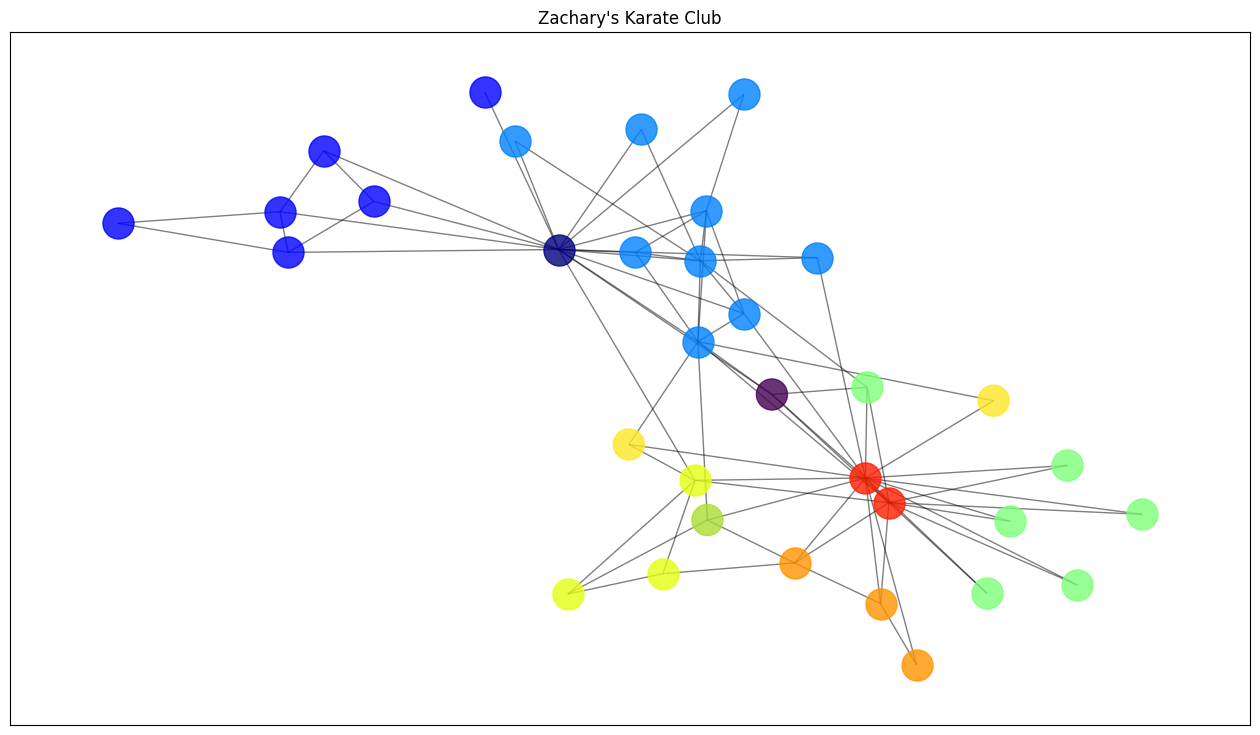

In [17]:
draw_communities(G, algorithms['affinity'].labels_, pos)

In [18]:
algorithms['kmeans'].labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
nmi_results = []
ars_results = []

y_true_val = list(y_true)

#Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

In [20]:
nmi_results

[1.0, 1.0, 0.8364981174679549, 0.5306272492634497]

In [24]:
x = np.arange(len(ars_results))
avg =[sum (x)/2 for x in zip(nmi_results,ars_results) ]
avg
xlabels = list(algorithms.keys())

In [26]:
def draw_true_vs_pred(G, y_true, y_pred, pos, algo_name, ax):
    
    for student, club in enumerate(y_true):
        if y_pred is not None:
            if club == y_pred[student]:
                node_color = [0, 1, 0]
                node_shape = 'o'
            else:
                node_color = [0, 0, 0]
                node_shape = 'o'
                
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[student],
                               node_color=node_color,
                               node_size=250,
                               alpha=0.7,
                               ax=ax,
                               node_shape=node_shape)
    
    # Draw edges and show final plot
    ax.set_title(algo_name)
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

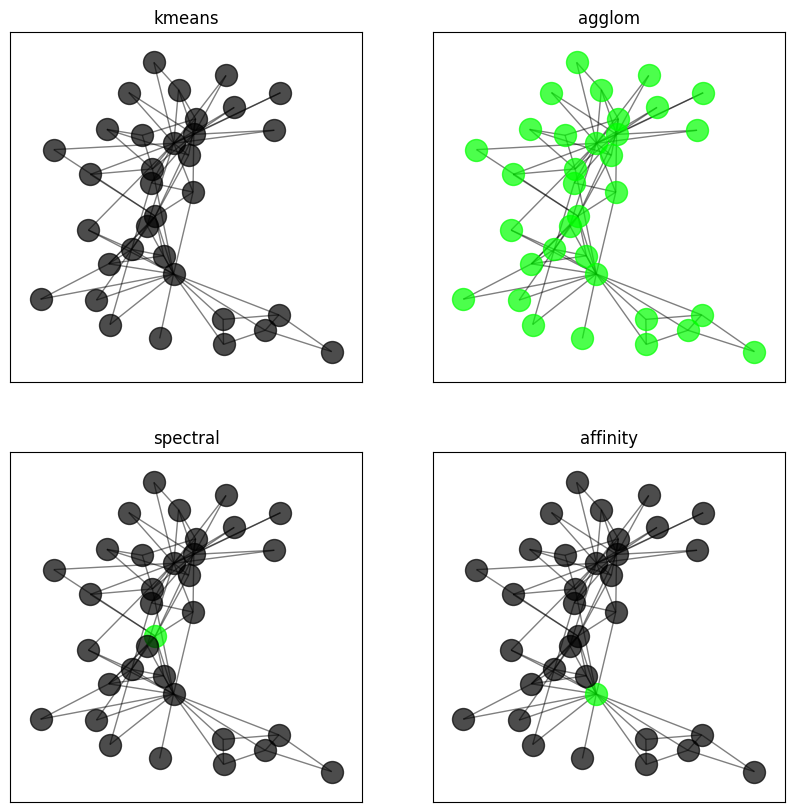

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))

for algo_name, ax in zip(algorithms.keys(), [ax1, ax2, ax3, ax4]):
    draw_true_vs_pred(G, y_true, algorithms[algo_name].labels_, pos, algo_name, ax)

# GCN
Meaningless... just like my futur...

In [3]:
import networkx as nx

# Load the karate dataset
G = nx.karate_club_graph()

# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 34
Number of edges: 78


Number of nodes: 34
Number of edges: 78
Epoch 0, Loss: 5.21565055847168
Epoch 10, Loss: 1.279162883758545
Epoch 20, Loss: 0.4235975742340088
Epoch 30, Loss: 0.2464940994977951
Epoch 40, Loss: 0.17271007597446442
Epoch 50, Loss: 0.13834315538406372
Epoch 60, Loss: 0.11838147044181824
Epoch 70, Loss: 0.10599803924560547
Epoch 80, Loss: 0.09733881801366806
Epoch 90, Loss: 0.09111162275075912
Accuracy: 0.9705882352941176


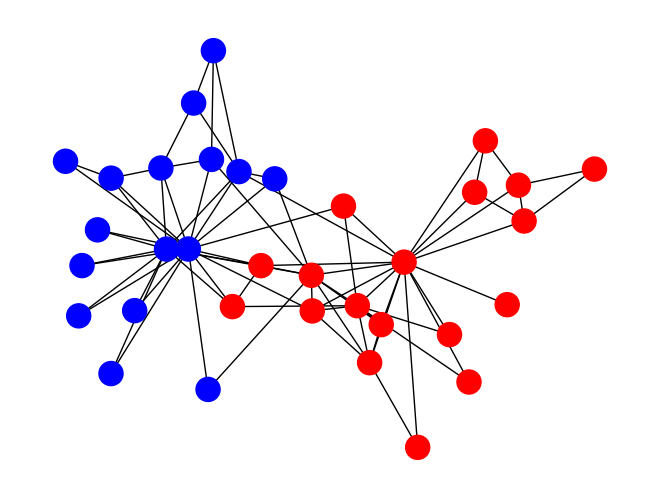

In [15]:
import networkx as nx
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Load the karate dataset
G = nx.karate_club_graph()

# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Convert the graph to an adjacency matrix
adj_matrix = coo_matrix(nx.to_numpy_array(G))

# Create a dictionary to map the labels to integers
label_dict = {"Mr. Hi": 0, "Officer": 1}

# Create an array of integer labels
labels = np.array([label_dict[node[1]["club"]] for node in G.nodes(data=True)])

# Create a one-hot encoding for the node labels
labels_one_hot = np.zeros((num_nodes, 2))
labels_one_hot[np.arange(num_nodes), labels] = 1

# Convert the adjacency matrix to a SparseTensor
adj_matrix = tf.sparse.SparseTensor(indices=np.array([adj_matrix.row, adj_matrix.col]).T,
                                    values=adj_matrix.data,
                                    dense_shape=adj_matrix.shape)

class GCN(tf.keras.layers.Layer):
    def __init__(self, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=hidden_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=output_dim, activation=None)

    def call(self, inputs):
        x, adj = inputs
        x = self.hidden_layer(x)
        x = tf.sparse.sparse_dense_matmul(adj, x)
        x = self.output_layer(x)
        return x

# Define the model
model = GCN(hidden_dim=16, output_dim=2)

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Train the model
for epoch in range(100):
    with tf.GradientTape() as tape:
        logits = model((labels_one_hot, adj_matrix))
        loss_value = loss_fn(labels_one_hot, logits)

    gradients = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss_value.numpy()}")

# Test the model
logits = model((labels_one_hot, adj_matrix))
predicted_labels = np.argmax(logits.numpy(), axis=1)
accuracy = np.mean(labels == predicted_labels)
print(f"Accuracy: {accuracy}")

# Create a dictionary to map the labels to colors
color_map = {0: "r", 1: "b"}

# Plot the graph with the predicted labels as node colors
nx.draw(G, pos=nx.spring_layout(G), node_color=[color_map[pred] for pred in predicted_labels])

# Show the plot
plt.show()